# Student Policies
Now that you know how model cost, conversion, demand, and optimize price and matching, we can move on the final part of this game, **building your policies!**. Below we have set up skeleton code for you to build your policies. Make when you finish to run the last code cell to upload your policy.

In [7]:
# Load in all your libraries and packages here!
# NOTE: you are allowed to use packages loaded below ONLY. If you want to use any other packages, please contact the TA.
import pandas as pd
import numpy as np
import itertools
import math
import random
import copy
import time
import pandas as pd
import haversine
import unittest
import pickle
import collections

from utils import * # this imports all helper functions in utils.py

# TODO: Replace the string "TeamName" below with your own team's name in camel case. For e.g. "AwesomeTeam"
# DO NOT RENAME THE FILE, the file name should be "{TEAM_NAME}_Policies.py"
TEAM_NAME = "TeamName"

# Pricing Policy

Feel free to add more functions to `StudentPricingPolicy` but **DO NOT** modify the initalization and static methods. Your code will only be graded based on the output of your pricing function.

In [ ]:
class StudentPricingPolicy:
    # DO NOT MODIFY
    def __init__(self, c = 0.70):
        self.c = c

    # DO NOT MODIFY
    @staticmethod
    def get_name():
        return TEAM_NAME

    def pricing_function(self, state, rider):
        """
        Returns the price of the given rider in the given state

        Parameters
        ----------
        state: list
            list of rider(s) (object) waiting in the state
        rider: object
            An incoming rider

        Returns
        -------
        float
            The price of the rider: must be in [0, 1]
        """
        
        return None

# Matching Policy

Again, feel free to add more functions to `StudentMatchingPolicy` but **DO NOT** modify the initalization and static methods. Your code will only be graded based on the output of your matching function.

In [60]:
class StudentMatchingPolicy:
    # DO NOT MODIFY
    def __init__(self, c = 0.70):
        self.c = c

    # DO NOT MODIFY
    @staticmethod
    def get_name():
        return TEAM_NAME

    def matching_function(self, state, rider):
        """
        Returns the matched rider or None is there is no match

        Parameters
        ----------
        state: list
            list of rider(s) (object) waiting in the state
        rider: object
            An incoming rider

        Returns
        -------
        rider or None:
            Returns a matched rider (object) or None
        """
        ...
        return None

# Testing your Code

Use the function below to test your policies. This output will only tell you the price and matching result from your policies.

The test examples consist of 4 states and 1 incoming rider:
- Four States: These represent states with 0, 8, 35, and 77 waiting requests, respectively. Each state is created by aggregating all arriving riders within random time windows of 0 seconds, 15 seconds, 1 minute, and 2 minutes from the training data.
- Incoming Rider: This rider is randomly sampled from the training data.

In [93]:
import time
import pandas as pd
import numpy as np
from haversine import haversine

def test_new(PricingPolicy, MatchingPolicy):
    random.seed(42)
    np.random.seed(42)
    """
    Test Policies Function: A function that tests policies based on a student's PricingPolicy and MatchingPolicy classes.

    Parameters:
        PricingPolicy (class): A student PricingPolicy class.
        MatchingPolicy (class): A student MatchingPolicy class.
    """

    instances = pd.read_pickle('data/test_examples.pickle')
    states = instances['states']
    rider = instances['rider']

    PricingPolicyInstance = PricingPolicy()
    MatchingPolicyInstance = MatchingPolicy()

    # Metrics
    total_arrivals = 0
    converted_riders = 0
    matched_riders = 0
    total_cost = 0
    total_quoted_price = 0
    total_payment = 0
    total_waiting_time = 0

    c = PricingPolicyInstance.c

    # Simulated values for testing
    def simulate_reservation_price(solo_length):
        """Simulate rider's max willing price per mile"""
        # Example: sigmoid curve with noise
        base = 1 / (1 + np.exp(-(solo_length - 1.5)))  # sigmoid centered around 1.5 miles
        noise = np.random.normal(0, 0.05)
        return np.clip(base + noise, 0.1, 1.0)

    def simulate_waiting_time():
        """Simulate waiting time (in seconds) from exponential dist"""
        return np.random.exponential(scale=200)  # mean = 200s

    for i, state in enumerate(states):
        
        total_arrivals += 1

        price = PricingPolicyInstance.pricing_function(state, rider)
        with open("log.txt", "a") as f:
            f.write(f"Processing state {i}...\n")
            f.write(f"Pricing decision: {price:.3f}\n")

        # Display only progress in notebook
        # clear_output(wait=True)
        print(f"Processing state {i}/{len(states)}")
        assert 0 <= price <= 1

        print(f'\n=============== Pricing at State {i} ({len(state)} waiting requests) ===============')
        print(f'Pricing decision: {price:.5f}')
        total_quoted_price += price

        solo_length = rider.solo_length
        reservation_price = simulate_reservation_price(solo_length)
        accepted = reservation_price >= price

        if accepted:
            converted_riders += 1
            payment = price * solo_length
            total_payment += payment
            total_cost += c

            matched_request = MatchingPolicyInstance.matching_function(state, rider)
            print(f'\n=============== Matching at State {i} ({len(state)} waiting requests) ===============')
            if matched_request is not None:
                assert matched_request.__class__.__name__.lower() == 'rider'
                assert matched_request in state
                matched_riders += 1
                waiting_time = simulate_waiting_time()
                total_waiting_time += waiting_time
                print('Matching decision: matched with a rider.')
            else:
                print('Matching decision: no match.')
        else:
            print('Rider rejected the price. No match attempted.')

    # Final metric computation
    throughput = converted_riders
    match_rate = matched_riders / throughput if throughput else 0
    conversion_rate = throughput / total_arrivals if total_arrivals else 0
    cost_efficiency = 1 - (total_cost / (throughput * c)) if throughput else 0
    avg_quoted_price = total_quoted_price / total_arrivals if total_arrivals else 0
    avg_payment = total_payment / throughput if throughput else 0
    avg_waiting_time = total_waiting_time / matched_riders if matched_riders else 0
    
    print('\n=============== FINAL EVALUATION METRICS ===============')
    print(f'Throughput: {throughput}')
    print(f'Match Rate: {match_rate:.3f}')
    print(f'Conversion Rate: {conversion_rate:.3f}')
    print(f'Cost Efficiency: {cost_efficiency:.3f}')
    print(f'Average Quoted Price: {avg_quoted_price:.3f} $/mile')
    print(f'Average Payment: {avg_payment:.3f} $/mile')
    print(f'Average Waiting Time: {avg_waiting_time:.2f} seconds')


C:\Users\emily\AppData\Local\Temp\ipykernel_31516\3822907077.py:34: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  base_price_table['hot_pair'] = base_price_table['hot_pair'].fillna(False)


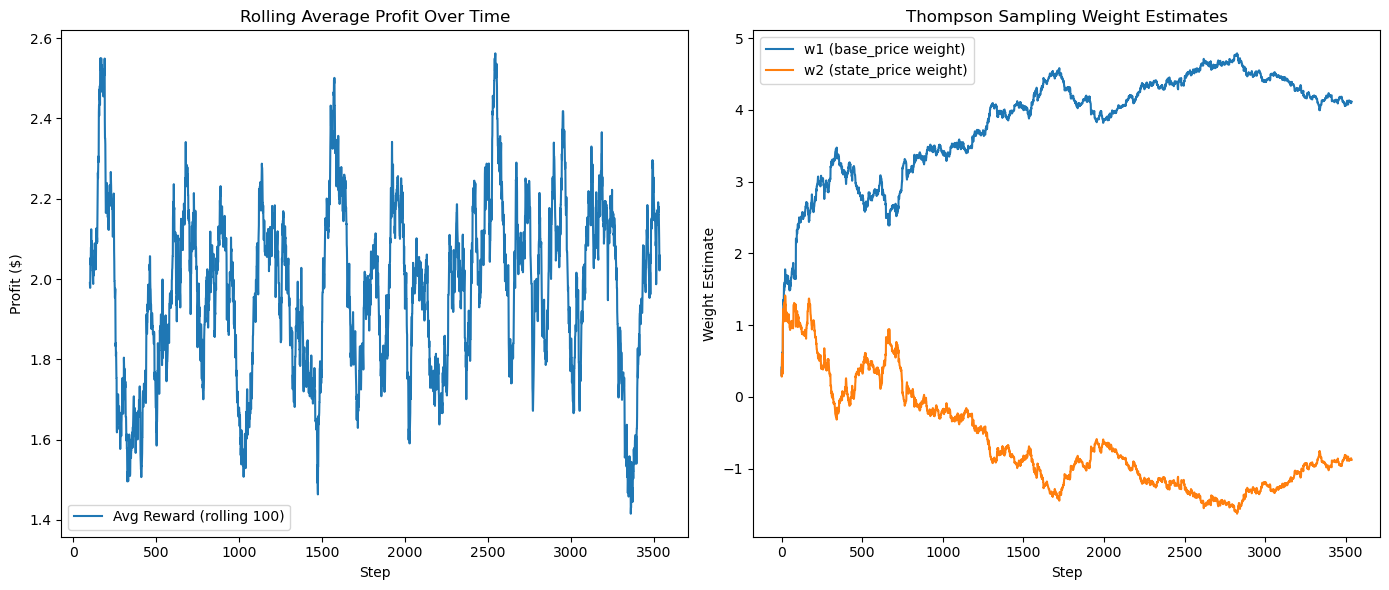

In [4]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from numpy.random import multivariate_normal
from haversine import haversine

# Load training data
training_data = pd.read_csv("data/training_data.csv")
area_coords = pd.read_csv("data/area_lat_lon.csv").set_index('area_id')

# Drop rows with missing conversion info
training_data.dropna(subset=['quoted_price', 'convert_or_not'], inplace=True)

# Split into offline (70%) and online (30%)
offline_data, online_data = train_test_split(training_data, test_size=0.3, random_state=42)

# Step 1.1: Median quoted price by (pickup_area, dropoff_area)
base_price_table = offline_data.groupby(['pickup_area', 'dropoff_area'])['quoted_price'].median().reset_index()
base_price_table.rename(columns={'quoted_price': 'median_price'}, inplace=True)

# Step 1.2: Conversion rate adjustment
conversion_rates = offline_data.groupby(['pickup_area', 'dropoff_area'])['convert_or_not'].mean().reset_index()
conversion_rates.rename(columns={'convert_or_not': 'conversion_rate'}, inplace=True)
base_price_table = base_price_table.merge(conversion_rates, on=['pickup_area', 'dropoff_area'], how='left')
base_price_table['base_price'] = base_price_table['median_price'] * (1 + 0.1 * (base_price_table['conversion_rate'] - 0.5))

# Step 1.3: Hot pair boost
pair_counts = offline_data.groupby(['pickup_area', 'dropoff_area']).size().reset_index(name='count')
thresh = pair_counts['count'].quantile(0.9)
hot_pairs = pair_counts[pair_counts['count'] > thresh][['pickup_area', 'dropoff_area']]
base_price_table = base_price_table.merge(hot_pairs.assign(hot_pair=True), on=['pickup_area', 'dropoff_area'], how='left')
base_price_table['hot_pair'] = base_price_table['hot_pair'].fillna(False)
base_price_table.loc[base_price_table['hot_pair'], 'base_price'] *= 1.05

# Step 1.4: Area marginal effects
pickup_avg = offline_data.groupby('pickup_area')['quoted_price'].mean()
dropoff_avg = offline_data.groupby('dropoff_area')['quoted_price'].mean()
overall_avg = offline_data['quoted_price'].mean()

def marginal_boost(row):
    pickup_boost = pickup_avg.get(row['pickup_area'], overall_avg) - overall_avg
    dropoff_boost = dropoff_avg.get(row['dropoff_area'], overall_avg) - overall_avg
    return 0.05 * (pickup_boost + dropoff_boost)

base_price_table['base_price'] += base_price_table.apply(marginal_boost, axis=1)

# Final result: base_price_table can now be used as a lookup for pricing
base_price_table.set_index(['pickup_area', 'dropoff_area'], inplace=True)

# Build similarity matrix for area pairs
def pair_similarity(p1, d1, p2, d2):
    dist = haversine(tuple(area_coords.loc[p1]), tuple(area_coords.loc[p2])) + \
           haversine(tuple(area_coords.loc[d1]), tuple(area_coords.loc[d2]))
    return max(0, 1 - dist / 20)  # Normalized similarity score

# Step 2: Simulate online pricing with dynamic adjustment and weight learning
A = np.identity(2)
b = np.zeros((2, 1))
online_log = []

for _, row in online_data.iterrows():
    pair = (row['pickup_area'], row['dropoff_area'])
    base_price = base_price_table.loc[pair, 'base_price'] if pair in base_price_table.index else 0.7

    # Simulated pool state
    pool_size = np.random.randint(0, 10)
    avg_waiting = np.random.uniform(0, 60)

    # Simulate current pool (choose 5 random entries)
    sample_pool = online_data.sample(5)
    similarity_scores = [pair_similarity(row['pickup_area'], row['dropoff_area'], r['pickup_area'], r['dropoff_area']) for _, r in sample_pool.iterrows()]
    similarity_effect = sum(1 for s in similarity_scores if s > 0.7)

    # Final state adjustment
    state_adjustment = -0.01 * (pool_size - 3) + -0.001 * avg_waiting + -0.02 * similarity_effect
    state_price = base_price + state_adjustment

    x = np.array([[base_price], [state_price]])
    A_inv = np.linalg.inv(A)
    theta_sample = multivariate_normal(mean=(A_inv @ b).flatten(), cov=A_inv)
    final_price = float(np.dot(theta_sample, x.flatten()))
    final_price = np.clip(final_price, 0.35, 1.0)

    converted = row['convert_or_not']
    reward = final_price * row['solo_length'] if converted else 0

    A += x @ x.T
    b += reward * x

    theta_hat = (np.linalg.inv(A) @ b).flatten()

    online_log.append({
        'rider_id': row['rider_id'],
        'base_price': base_price,
        'state_price': state_price,
        'final_price': final_price,
        'converted': converted,
        'reward': reward,
        'theta_1': theta_hat[0],
        'theta_2': theta_hat[1]
    })

# Save log to CSV and evaluate
log_df = pd.DataFrame(online_log)
log_df.to_csv("online_simulation_log.csv", index=False)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(log_df['reward'].rolling(100).mean(), label='Avg Reward (rolling 100)')
plt.xlabel('Step')
plt.ylabel('Profit ($)')
plt.title('Rolling Average Profit Over Time')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(log_df['theta_1'], label='w1 (base_price weight)')
plt.plot(log_df['theta_2'], label='w2 (state_price weight)')
plt.xlabel('Step')
plt.ylabel('Weight Estimate')
plt.title('Thompson Sampling Weight Estimates')
plt.legend()

plt.tight_layout()
plt.savefig("pricing_policy_evaluation.png")
plt.show()

# Save processed data
base_price_table.to_csv("base_price_table.csv")
offline_data.to_csv("base_training_data.csv", index=False)
online_data.to_csv("online_training_data.csv", index=False)


In [9]:
import pandas as pd

# Load the simulation log and original training data
log_df = pd.read_csv("online_simulation_log.csv")
training_data = online_data

# Drop rows with missing conversion info
training_data = training_data.dropna(subset=["quoted_price", "convert_or_not"])

# ----- Evaluation for your Thompson Sampling policy -----

# Conversion rate in your policy
simulated_conversion_rate = log_df['converted'].mean()

# Total profit from converted riders
simulated_total_profit = log_df['reward'].sum()

# Average reward per rider
simulated_avg_reward = log_df['reward'].mean()

# ----- Baseline from training data -----

# Conversion rate in training set
training_conversion_rate = training_data['convert_or_not'].mean()

# Total baseline profit (quoted_price * solo_length if converted)
training_data['baseline_reward'] = training_data['quoted_price'] * training_data['solo_length'] * training_data['convert_or_not']
baseline_total_profit = training_data['baseline_reward'].sum()

# Average baseline profit per rider
baseline_avg_reward = training_data['baseline_reward'].mean()

# Return results
evaluation_results = {
    "Simulated Conversion Rate": simulated_conversion_rate,
    "Simulated Total Profit": simulated_total_profit,
    "Simulated Avg Profit per Rider": simulated_avg_reward,
    "Training Conversion Rate": training_conversion_rate,
    "Training Total Profit": baseline_total_profit,
    "Training Avg Profit per Rider": baseline_avg_reward
}

evaluation_df = pd.DataFrame.from_dict(evaluation_results, orient='index', columns=["Value"])

In [10]:
evaluation_df

,Value
Simulated Conversion Rate,0.577043
Simulated Total Profit,6970.453567
Simulated Avg Profit per Rider,1.970725
Training Conversion Rate,0.577043
Training Total Profit,3832.476372
Training Avg Profit per Rider,1.083539


In [ ]:
# Full Matching Policy: Learned Scoring Based on Rider Pair Features
import numpy as np
import pandas as pd
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from utils import populate_shared_ride_lengths

# ---------------------------------------------
# FEATURE ENGINEERING FOR MATCHING PAIRS
# ---------------------------------------------
def compute_match_features(rider_i, rider_j, area_coords):
    oi = (rider_i['pickup_lat'], rider_i['pickup_lon'])
    di = (rider_i['dropoff_lat'], rider_i['dropoff_lon'])
    oj = (rider_j['pickup_lat'], rider_j['pickup_lon'])
    dj = (rider_j['dropoff_lat'], rider_j['dropoff_lon'])

    trip_length, shared_length, _, _, _ = populate_shared_ride_lengths(oi, di, oj, dj)
    if trip_length == 0:
        return None

    shared_efficiency = shared_length / trip_length
    detour_penalty = trip_length - (rider_i['solo_length'] + rider_j['solo_length'])
    time_diff = abs(rider_i['arrival_time'] - rider_j['arrival_time'])
    time_sync = np.exp(-time_diff / 60)

    waiting_i = rider_i['waiting_time'] if not pd.isna(rider_i['waiting_time']) else 0
    waiting_j = rider_j['waiting_time'] if not pd.isna(rider_j['waiting_time']) else 0
    avg_waiting = (waiting_i + waiting_j) / 2

    return [shared_efficiency, time_sync, avg_waiting, detour_penalty]

# ---------------------------------------------
# MATCHING POLICY CLASS
# ---------------------------------------------
class ScoreBasedMatchingPolicy:
    def __init__(self, model_path=None):
        self.waiting_pool = []
        self.model = LogisticRegression()
        if model_path:
            with open(model_path, 'rb') as f:
                self.model = pickle.load(f)

    def fit_weights(self, X_train, y_train):
        self.model.fit(X_train, y_train)
        with open("learned_weights_model.pkl", 'wb') as f:
            pickle.dump(self.model, f)

    def score_pair(self, rider_i, rider_j, area_coords):
        features = compute_match_features(rider_i, rider_j, area_coords)
        if features is None:
            return -np.inf
        return self.model.predict_proba([features])[0][1]

# ---------------------------------------------
# DATA PREPARATION AND SPLITTING
# ---------------------------------------------
data = pd.read_csv("data/training_data.csv")
data = data.sort_values(by='arrival_time').reset_index(drop=True)

train_data, valid_data = train_test_split(data, test_size=0.3, random_state=42)
area_coords = pd.read_csv("data/area_lat_lon.csv").set_index("area_id")

# ---------------------------------------------
# PREPARE TRAINING DATA (MATCHED/UNMATCHED PAIRS)
# ---------------------------------------------
def generate_pairwise_training_data(df):
    pairs = []
    labels = []
    riders = df.to_dict('records')
    for i in range(len(riders)):
        for j in range(i + 1, len(riders)):
            rider_i, rider_j = riders[i], riders[j]
            features = compute_match_features(rider_i, rider_j, area_coords)
            if features:
                matched = int(rider_i['matching_outcome'] == rider_j['rider_id'] or rider_j['matching_outcome'] == rider_i['rider_id'])
                pairs.append(features)
                labels.append(matched)
    return np.array(pairs), np.array(labels)

X_train, y_train = generate_pairwise_training_data(train_data)

if len(set(y_train)) < 2:
    raise ValueError("Training data must include both matched and unmatched pairs.")

policy = ScoreBasedMatchingPolicy()
policy.fit_weights(X_train, y_train)

# Compute score threshold by quantile
train_probs = policy.model.predict_proba(X_train)[:, 1]
threshold = np.percentile(train_probs, 20)

# ---------------------------------------------
# Simulated Matching using Validation Set
# ---------------------------------------------
converted_simulated = 0
waiting_pool = []

for _, new_rider in valid_data.iterrows():
    if len(waiting_pool) < 5:
        waiting_pool.append(new_rider)
        continue

    candidates = []
    for waiting_rider in waiting_pool:
        score = policy.score_pair(new_rider, waiting_rider, area_coords)
        if score > threshold:
            candidates.append((waiting_rider, score))

    if candidates:
        best_match = max(candidates, key=lambda x: x[1])[0]
        waiting_pool = [r for r in waiting_pool if not r.equals(best_match)]
        converted_simulated += 1
    else:
        waiting_pool.append(new_rider)

converted_actual = valid_data['matching_outcome'].notna().sum()

print("Converted (original validation set):", converted_actual)
print("Converted (simulated model):", converted_simulated)
print("Conversion Rate (original):", converted_actual / len(valid_data))
print("Conversion Rate (simulated):", converted_simulated / len(valid_data))


Converted (original validation set): 1651
Converted (simulated model): 1625
Conversion Rate (original): 0.46677975685609274
Conversion Rate (simulated): 0.45942889454339836


In [ ]:
# Full Matching Policy: Learned Scoring Based on Rider Pair Features
import numpy as np
import pandas as pd
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from utils import populate_shared_ride_lengths

# ---------------------------------------------
# FEATURE ENGINEERING FOR MATCHING PAIRS
# ---------------------------------------------
def compute_match_features(rider_i, rider_j, area_coords):
    oi = (rider_i['pickup_lat'], rider_i['pickup_lon'])
    di = (rider_i['dropoff_lat'], rider_i['dropoff_lon'])
    oj = (rider_j['pickup_lat'], rider_j['pickup_lon'])
    dj = (rider_j['dropoff_lat'], rider_j['dropoff_lon'])

    trip_length, shared_length, _, _, _ = populate_shared_ride_lengths(oi, di, oj, dj)
    if trip_length == 0:
        return None

    shared_efficiency = shared_length / trip_length
    detour_penalty = trip_length - (rider_i['solo_length'] + rider_j['solo_length'])
    time_diff = abs(rider_i['arrival_time'] - rider_j['arrival_time'])
    time_sync = np.exp(-time_diff / 60)

    waiting_i = rider_i['waiting_time'] if not pd.isna(rider_i['waiting_time']) else 0
    waiting_j = rider_j['waiting_time'] if not pd.isna(rider_j['waiting_time']) else 0
    avg_waiting = (waiting_i + waiting_j) / 2

    return [shared_efficiency, time_sync, avg_waiting, detour_penalty]

# ---------------------------------------------
# MATCHING POLICY CLASS
# ---------------------------------------------
class ScoreBasedMatchingPolicy:
    def __init__(self, model_path=None):
        self.waiting_pool = []
        self.model = LogisticRegression()
        if model_path:
            with open(model_path, 'rb') as f:
                self.model = pickle.load(f)

    def fit_weights(self, X_train, y_train):
        self.model.fit(X_train, y_train)
        with open("learned_weights_model.pkl", 'wb') as f:
            pickle.dump(self.model, f)

    def score_pair(self, rider_i, rider_j, area_coords):
        features = compute_match_features(rider_i, rider_j, area_coords)
        if features is None:
            return -np.inf
        return self.model.predict_proba([features])[0][1]

# ---------------------------------------------
# DATA PREPARATION AND SPLITTING
# ---------------------------------------------
data = pd.read_csv("data/training_data.csv")
data = data.sort_values(by='arrival_time').reset_index(drop=True)

train_data, valid_data = train_test_split(data, test_size=0.3, random_state=42)
area_coords = pd.read_csv("data/area_lat_lon.csv").set_index("area_id")

# ---------------------------------------------
# PREPARE TRAINING DATA (MATCHED/UNMATCHED PAIRS)
# ---------------------------------------------
def generate_pairwise_training_data(df):
    pairs = []
    labels = []
    riders = df.to_dict('records')
    for i in range(len(riders)):
        for j in range(i + 1, len(riders)):
            rider_i, rider_j = riders[i], riders[j]
            features = compute_match_features(rider_i, rider_j, area_coords)
            if features:
                matched = int(rider_i['matching_outcome'] == rider_j['rider_id'] or rider_j['matching_outcome'] == rider_i['rider_id'])
                pairs.append(features)
                labels.append(matched)
    return np.array(pairs), np.array(labels)

X_train, y_train = generate_pairwise_training_data(train_data)

if len(set(y_train)) < 2:
    raise ValueError("Training data must include both matched and unmatched pairs.")

policy = ScoreBasedMatchingPolicy()
policy.fit_weights(X_train, y_train)

# Compute score threshold by quantile
train_probs = policy.model.predict_proba(X_train)[:, 1]
threshold = np.percentile(train_probs, 10)

# ---------------------------------------------
# Simulated Matching using Validation Set
# ---------------------------------------------
converted_simulated = 0
waiting_pool = []


for _, new_rider in valid_data.iterrows():
    if len(waiting_pool) < 5:
        waiting_pool.append(new_rider)
        continue

    candidates = []
    for waiting_rider in waiting_pool:
        score = policy.score_pair(new_rider, waiting_rider, area_coords)
        if score > threshold:
            candidates.append((waiting_rider, score))

    if candidates:
        best_match = max(candidates, key=lambda x: x[1])[0]
        waiting_pool = [r for r in waiting_pool if not r.equals(best_match)]
        converted_simulated += 1
    else:
        waiting_pool.append(new_rider)

converted_actual = valid_data['matching_outcome'].notna().sum()

print("Converted (original validation set):", converted_actual)
print("Converted (simulated model):", converted_simulated)
print("Conversion Rate (original):", converted_actual / len(valid_data))
print("Conversion Rate (simulated):", converted_simulated / len(valid_data))


Converted (original validation set): 1651
Converted (simulated model): 1696
Conversion Rate (original): 0.46677975685609274
Conversion Rate (simulated): 0.4795024031665253


## Congrats! You finished!

Once you have completed this notebook, you can run the following command to export your notebook to a python script. Make sure to submit only `{TEAM_NAME}_Policies.py` file. Please do not edit anything!

In [5]:
# DO NOT MODIFY
from utils import export_notebook
# export the notebook as a .py file with name of "{TEAM_NAME}_Policies.py"
export_notebook(TEAM_NAME)

[NbConvertApp] Converting notebook student_policies.ipynb to script


Converted student_policies.ipynb to TeamName_Policies.py successfully, and removed print statements!


[NbConvertApp] Writing 3784 bytes to student_policies.py
